# Validation : Duma upper arm (1999)
#### Model validation information
- Performed by : Ali Riazi
- Reviewed by : Johan Iraeus and Bengt Pipkorn

Added to SAFER HBM Validation Catalog on : 2024-01-17

Recent update : 2024-01-17

#### Summary: 
- The simulation of the 3-point bending test is conducted on an isolated humerus with soft tissue, following the experimental approach of Duma et al., 1999 

Ref: 
DUMA, S.; SCHREIBER, P., MCMASTER, J; CRANDALL, J; BASS, C.; PILKEY W. Dynamic Injury tolerances for long bones of the female upper extremity Journal of anatomy 194.3 (1999): 463-471.


<div>
<img src="Capture.PNG" width="500"/>
</div>

## Experiment description
## Information on the specimens
- Tweleve female humeri(average age: 57±11, average body mass: 58.7±7.6 kg)
#### Impact and Positioning
- The isolated humerus was placed in a posteroanterior position between two potting cups, and the impactor, with an initial speed of 3.63 m/s and diameter of 25 mm, struck the midshaft in the posterior-anterior direction.

### Loading and Boundary Conditions
- The potting cups can rotate in the sagittal plane and can translate along the bone

### Responses recorded
- Contact force between the impactor and the soft tissue


### SAFER HBM Version: `11.0`


# Setup and prerequisites 

In [13]:
import os
import glob
import numpy
import sys
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from objective_rating_metrics.rating import ISO18571
from scipy import ndimage
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)


## Variable declaration

In [14]:
# Path to existing binouts

Sim_Tests = ['3p_bending_PA']
Exp_Tests = [] 

figures_dir = "results/figures/"
processed_data_dir = f"data/processed/"
experiment_dir= "../experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Sim_Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


# Postprocessing with dynasaur

In [15]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [16]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/Postprocess.def"]

## Extracting Time Series 

In [17]:
# Intialize a DataVisualizationController object, by passing the following argument 
#  -  binout files (data_source) 
#  -  list of dynasaur definition files (object_def_file, calculation_procedure_def_file)

sim_output={}
exp={}
exp_t = {}
for test in Sim_Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[WARNING]	BOUNDARY_CONDITION used in your calculation procedure file, but not available in your binout
[WARNING]	OBJECT used in your calculation procedure file, but not available in your binout
[{'visualization': 'Impactor_Force', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Impactor_Force_non_filter', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Pot_prox_Force_non_filter', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Pot_dist_Force_non_filter', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'Humerus_cortical_Compression_strain_gauge', 'x_label': 'time', 'y_label': 'strain'}, {'visualization': 'Humerus_cortical_Tension_strain_gauge', 'x_label': 'time', 'y_label': 'strain'}]
[CALCULATION]	Calculating Visualization: Impactor_Fo

C:\Users\seyedri\AppData\Roaming\Python\Python39\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Impactor_Force_non_filter
[DATA]	read id 2m from channel name: z_force
[CALCULATION]	Calculating Visualization: Pot_prox_Force_non_filter
[CALCULATION]	Calculating Visualization: Pot_dist_Force_non_filter
[CALCULATION]	Calculating Visualization: Humerus_cortical_Compression_strain_gauge
[CALCULATION]	Calculating Visualization: Humerus_cortical_Tension_strain_gauge
[CALCULATION]	DATA VISUALIZATION writing csv to data/processed/3p_bending_PA
[CALCULATION]	DATA VISUALIZATION done writing csv to data/processed/3p_bending_PA\Dynasaur_output.csv


# Input the expriment data

In [18]:
exp = {}
exp_test = {}
exp_test = ['forcetime_low.csv','forcetime_high.csv','forcetime1.csv','forcetime2.csv','forcetime3.csv','forcetime4.csv','forcetime5.csv','forcetime6.csv','forcetime7.csv','forcetime8.csv','forcetime9.csv']
for test in exp_test:
    exp[test] = pd.read_csv(os.path.join(experiment_dir, test),delimiter=',',header=None)
    if test != 'forcetime_low.csv':
        exp[test] = exp[test][::-1].reset_index(drop = True)
exp['forcetime_low.csv'][1] = exp['forcetime_low.csv'][1]/1000


# Plotting


The contact force is plotted up until the maximum value, and 9 Force vs time data sets from different specimens were extracted and plotted from the experiment 

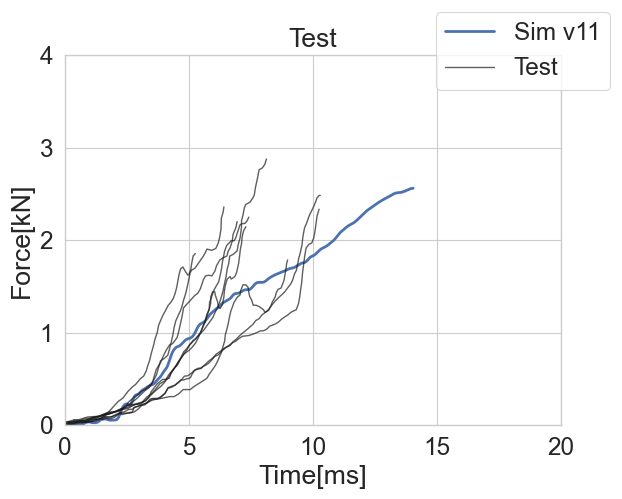

In [19]:
fig_ft = plt.figure(1)
i = 0
plt.xlim([0,20])
plt.ylim([0,4])
plt.xlabel('Time[ms]')
plt.ylabel('Force[kN]')
plt.title('Test')
df = pd.DataFrame(-sim_output[Sim_Tests[i]].Impactor.Force_non_filter.force)
max_index_PA = 320
plt.plot(sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[0:max_index_PA]-sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[38],sim_output[Sim_Tests[0]].Impactor.Force.force.iloc[0:max_index_PA],linestyle ='-', color = 'b',alpha =1,linewidth=2)
# plt.plot(sim_output[Sim_Tests[0]].Impactor.Force.time-sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[38],sim_output[Sim_Tests[0]].Impactor.Force.force,linestyle ='-', color = 'b',alpha =1,linewidth=2)

for test in ['forcetime_low.csv','forcetime1.csv','forcetime2.csv','forcetime3.csv','forcetime4.csv','forcetime5.csv','forcetime7.csv','forcetime8.csv','forcetime9.csv']:
    plt.plot(exp[test].values[:,0],exp[test].values[:,1],linestyle ='-', color =  'k',alpha = 0.7, linewidth=1,label='Test')
# plt.axvline(x = sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[max_index_PA-1].values-sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[38].values, color = 'black',linestyle='dashed')
fig_ft.legend(['Sim v11','Test'])
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")

# ISO Score

The ISO score is derived by comparing the simulation with the average of the experimental data.

In [21]:

exp_list = ['forcetime_low.csv','forcetime1.csv','forcetime2.csv','forcetime3.csv','forcetime4.csv','forcetime5.csv','forcetime7.csv','forcetime8.csv','forcetime9.csv']
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = numpy.arange(0,endtime,0.1)#10kHz resolution
    newy = numpy.interp(newx, x, y)
    return numpy.array(newy).flatten()
def iso_score_cal(sim_output,Sim_Tests,exp,exp_list):

    sim_out_t = sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[52:330].values-sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[52].values
    sim_out_f = sim_output[Sim_Tests[0]].Impactor.Force.force.iloc[52:330].values
    df = pd.DataFrame(sim_out_f)
    max_index = df.idxmax().values
    sim_out_f = sim_out_f[0:max_index[0]]
    sim_out_t = sim_out_t[0:max_index[0]]
    exp_t = {}
    exp_f = {}
    exp_ff = {}
    ref = {}
    comp = {}
    e_f = {}
    max_index_test = {}
    max_index_case = {}
    ratings = []
    exp_ft_avg = 0
    factor = 100
    for test in exp_list:
        max_index_test[test] = exp[test][0].iloc[-1]
        min_len_test = min(max_index_test,key=max_index_test.get) 

    T_samp=numpy.arange(0,exp[min_len_test][0].iloc[-1].round(2),0.1)

    for test in exp_list: 
        exp[test][0] = exp[test][0] - exp[test][0][0]
        exp_t[test] = ndimage.zoom(exp[test][0],factor)
        exp_f[test] = ndimage.zoom(exp[test][1],factor)
        sim_f = ndimage.zoom(sim_out_f,factor)
        sim_t = ndimage.zoom(sim_out_t,factor)
        

    for test in exp_list:
        max_index_case[test] = numpy.where(abs(exp_t[test] - exp_t[min_len_test][-1]) < .005)
        exp_t[test] = exp_t[test][0:max_index_case[test][0][0]]
        exp_f[test] = exp_f[test][0:max_index_case[test][0][0]]
        e_f[test] = resam(exp_t[test],exp_f[test],exp[min_len_test][0].iloc[-1].round(2)) 

    max_index_sim = numpy.where(abs(sim_t - exp_t[min_len_test][-1]) < .005)
        
    tmp = 0
    for test in exp_list:
        tmp = e_f[test]/len(exp_list) + tmp
    exp_avg = tmp
    sim_f = numpy.array(sim_f[0:max_index_sim[0][0]]).flatten()
    sim_t = numpy.array(sim_t[0:max_index_sim[0][0]]).flatten()
    exp_avg = numpy.array(exp_avg).flatten()
    s_f=resam(sim_t,sim_f,exp[min_len_test][0].iloc[-1].round(2))
    sim = numpy.vstack((T_samp,s_f)).T
    test = numpy.vstack((T_samp, exp_avg)).T
    iso_rating = ISO18571(reference_curve=test, comparison_curve=sim) 
    ratings.append(['3pt bending PA',
        iso_rating.corridor_rating().round(2), 
        iso_rating.phase_rating(),
        iso_rating.magnitude_rating().round(2),
        iso_rating.slope_rating().round(2),
        iso_rating.overall_rating().round(2)])
    rating_array = []
    rating_array = numpy.append(rating_array, ratings)
    rating_array = rating_array.transpose()
    rating_array = numpy.reshape(rating_array, (1,6))
    return(rating_array,exp_ff,exp_ft_avg,sim_out_f,sim_out_t)
ISO = iso_score_cal(sim_output,Sim_Tests,exp,exp_list)
df = pd.DataFrame(ISO[0], columns=['Simulation', 'Corridor', 'Phase', 'Magnitude', 'Slope', 'Overall'])
df

,Simulation,Corridor,Phase,Magnitude,Slope,Overall
0,3pt bending PA,0.64,0.135,0.88,0.86,0.63


### Plotting the corresponding time range for ISO score

In [22]:
exp_list = ['forcetime_low.csv','forcetime1.csv','forcetime2.csv','forcetime3.csv','forcetime4.csv','forcetime5.csv','forcetime7.csv','forcetime8.csv','forcetime9.csv']
a = 1
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = numpy.arange(0,endtime,0.1)#10kHz resolution
    newy = numpy.interp(newx, x, y)
    return numpy.array(newy).flatten()
if a== 1:
    sim_out_t = sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[52:330].values-sim_output[Sim_Tests[0]].Impactor.Force.time.iloc[52].values
    sim_out_f = sim_output[Sim_Tests[0]].Impactor.Force.force.iloc[52:330].values
    sim_out = sim_output[Sim_Tests[0]].Impactor.Force.time.values
    df = pd.DataFrame(sim_out_f)
    max_index = df.idxmax().values
    max_sim = sim_out_f[max_index]
    sim_out_f = sim_out_f[0:max_index[0]]
    sim_out_t = sim_out_t[0:max_index[0]]
    exp_t = {}
    exp_f = {}
    exp_ft = {}
    exp_tt = {}
    exp_ff = {}
    factor_ = {}
    ref = {}
    comp = {}
    e_f = {}
    max_index_test = {}
    max_index_case = {}
    ratings = []
    exp_ft_avg = 0
    factor = 100
    for test in exp_list:
        max_index_test[test] = exp[test][0].iloc[-1]
        min_len_test = min(max_index_test,key=max_index_test.get) 

    T_samp=numpy.arange(0,exp[min_len_test][0].iloc[-1].round(2),0.1)

    for test in exp_list: 
        exp[test][0] = exp[test][0] - exp[test][0][0]
        exp_t[test] = ndimage.zoom(exp[test][0],factor)
        exp_f[test] = ndimage.zoom(exp[test][1],factor)
        sim_f = ndimage.zoom(sim_out_f,factor)
        sim_t = ndimage.zoom(sim_out_t,factor)
        

    for test in exp_list:
        max_index_case[test] = numpy.where(abs(exp_t[test] - exp_t[min_len_test][-1]) < .005)
        exp_t[test] = exp_t[test][0:max_index_case[test][0][0]]
        exp_f[test] = exp_f[test][0:max_index_case[test][0][0]]
        e_f[test] = resam(exp_t[test],exp_f[test],exp[min_len_test][0].iloc[-1].round(2)) 

    max_index_sim = numpy.where(abs(sim_t - exp_t[min_len_test][-1]) < .005)
        
    tmp = 0
    for test in exp_list:
        tmp = e_f[test]/len(exp_list) + tmp
    exp_avg = tmp
    sim_f = numpy.array(sim_f[0:max_index_sim[0][0]]).flatten()
    sim_t = numpy.array(sim_t[0:max_index_sim[0][0]]).flatten()
    exp_avg = numpy.array(exp_avg).flatten()
    s_f=resam(sim_t,sim_f,exp[min_len_test][0].iloc[-1].round(2))
    sim = numpy.vstack((T_samp,s_f)).T
    test = numpy.vstack((T_samp, exp_avg)).T

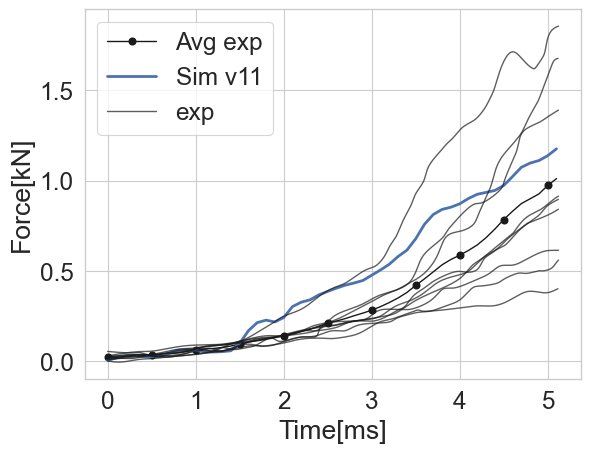

In [23]:
fig_ft = plt.figure(1)
plt.plot(T_samp,exp_avg, linestyle = '-', color = 'k', alpha = 1, linewidth = 1, marker = "o", markevery = 5)
plt.plot(T_samp,s_f,linestyle ='-', color = 'b',alpha =1, linewidth = 2)

for test in ['forcetime_low.csv','forcetime1.csv','forcetime2.csv','forcetime3.csv','forcetime4.csv','forcetime5.csv','forcetime7.csv','forcetime8.csv','forcetime9.csv']:
    plt.plot(exp_t[test],exp_f[test],linestyle ='-', color =  'k',alpha = 0.7, linewidth=1,label='Test')

plt.legend(['Avg exp','Sim v11','exp'])
plt.xlabel('Time[ms]')
plt.ylabel('Force[kN]')
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v11.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")